<a href="https://colab.research.google.com/github/Ahmed-M-Elshazly/Homework-5/blob/main/Homework_5_Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 5-Problem 2
#Ahmed elshazly
#801420724

In [ ]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics

In [ ]:
def linear_model(x, w, b):
    return x @ w + b

In [ ]:
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

In [ ]:
def train (n_epochs, model, optimizer, parameters, x_train, y_train, x_val, y_val):
  train_rmse_list = []
  val_rmse_list = []
  for epoch in range(n_epochs+1):
    train_x_p=model(x_train,*parameters)
    train_loss=loss_fn(train_x_p,y_train)

    with torch.no_grad():
      val_x_p=model(x_val,*parameters)
      val_loss=loss_fn(val_x_p,y_val)
      assert val_loss.requires_grad==False

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_rmse = torch.sqrt(train_loss).detach().item()
    train_rmse_list.append(train_rmse)
    val_rmse = torch.sqrt(val_loss).detach().item()
    val_rmse_list.append(val_rmse)

    if epoch % 500==0:
      print(f"Epoch {epoch}, Training RMSE {train_rmse:.4f}, Validation RMSE {val_rmse:.4f}")

  return parameters,train_rmse_list, val_rmse_list

In [ ]:
file_path = url = 'https://raw.githubusercontent.com/Ahmed-M-Elshazly/Database/main/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
furnishingstatus=housing.pop('furnishingstatus')
mainroad=housing.pop('mainroad')
guestroom=housing.pop('guestroom')
basement=housing.pop('basement')
hotwaterheating=housing.pop('hotwaterheating')
airconditioning=housing.pop('airconditioning')
prefarea=housing.pop('prefarea')
housing.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [ ]:
stander=StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
housing[num_vars] = stander.fit_transform(housing[num_vars])
Y=housing.pop("price")
X=housing
Y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [ ]:
X = torch.tensor(X.values)
Y = torch.tensor(Y.values)
n_samples=X.shape[0]
n_val=int(0.2*n_samples)
shuffled_indices=torch.randperm(n_samples)

train_indices=shuffled_indices[ : -n_val]
val_indices=shuffled_indices[-n_val :]

train_X=X[train_indices]
train_Y=Y[train_indices]

val_X=X[val_indices]
val_Y=Y[val_indices]

train_X = train_X.float()
val_X = val_X.float()
train_Y = train_Y.float()
val_Y = val_Y.float()


Training with learning rate: 0.01
Epoch 0, Training RMSE 5096888.0000, Validation RMSE 5211146.0000
Epoch 500, Training RMSE 1232811.0000, Validation RMSE 1271882.0000
Final parameters with learning rate 0.01: [tensor([703840.0000, 131679.5156, 538040.8750, 468670.0000, 267364.6250],
       requires_grad=True), tensor(4715475., requires_grad=True)]


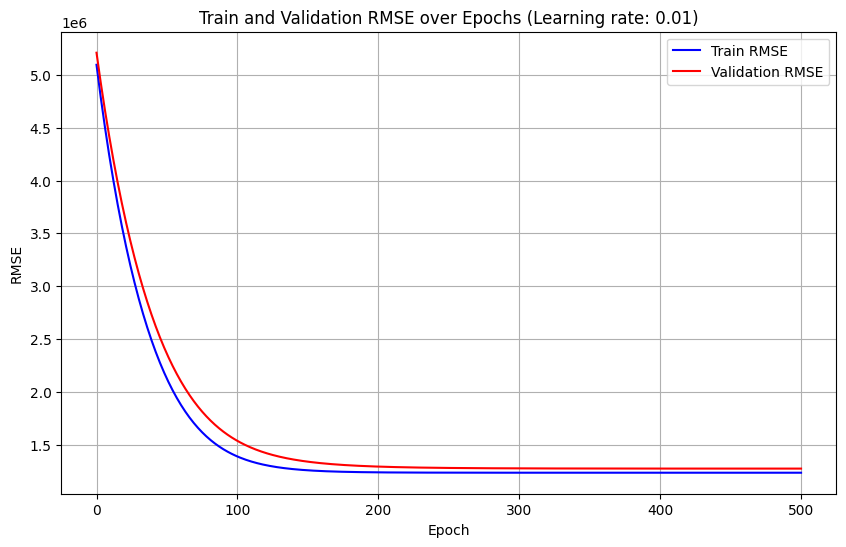

In [ ]:
learning_rates = [0.01]
number_of_epochs=500
for learning_rate in learning_rates:
  print(f"\nTraining with learning rate: {learning_rate}")
  w = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
  b = torch.tensor(0.0, requires_grad=True)
  optimizer=optim.SGD([w, b], lr=learning_rate)
  trained_parameters, train_rmse, val_rmse=train(
      n_epochs=number_of_epochs,
      model=linear_model,
      optimizer=optimizer,
      parameters=[w,b],
      x_train=train_X,
      y_train=train_Y,
      x_val=val_X,
      y_val=val_Y
  )
  print(f"Final parameters with learning rate {learning_rate}: {trained_parameters}")
  plt.figure(figsize=(10, 6))
  plt.plot(range(0, number_of_epochs+1), train_rmse, label='Train RMSE', color='blue')
  plt.plot(range(0, number_of_epochs+1), val_rmse, label='Validation RMSE', color='red')
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.title(f'Train and Validation RMSE over Epochs (Learning rate: {learning_rate})')
  plt.legend()
  plt.grid(True)
  plt.show()


Training with learning rate: 0.1
Epoch 0, Training RMSE 5096888.0000, Validation RMSE 5211146.0000
Epoch 500, Training RMSE 1232810.6250, Validation RMSE 1271836.7500
Epoch 1000, Training RMSE 1232810.6250, Validation RMSE 1271836.7500
Epoch 1500, Training RMSE 1232810.6250, Validation RMSE 1271836.7500
Epoch 2000, Training RMSE 1232810.6250, Validation RMSE 1271836.7500
Epoch 2500, Training RMSE 1232810.6250, Validation RMSE 1271836.7500
Epoch 3000, Training RMSE 1232810.6250, Validation RMSE 1271836.7500
Epoch 3500, Training RMSE 1232810.6250, Validation RMSE 1271836.7500
Epoch 4000, Training RMSE 1232810.6250, Validation RMSE 1271836.7500
Epoch 4500, Training RMSE 1232810.6250, Validation RMSE 1271836.7500
Epoch 5000, Training RMSE 1232810.6250, Validation RMSE 1271836.7500
Final parameters with learning rate 0.1: [tensor([704282.3750, 130758.5469, 538430.9375, 469212.4375, 266937.3125],
       requires_grad=True), tensor(4715720., requires_grad=True)]


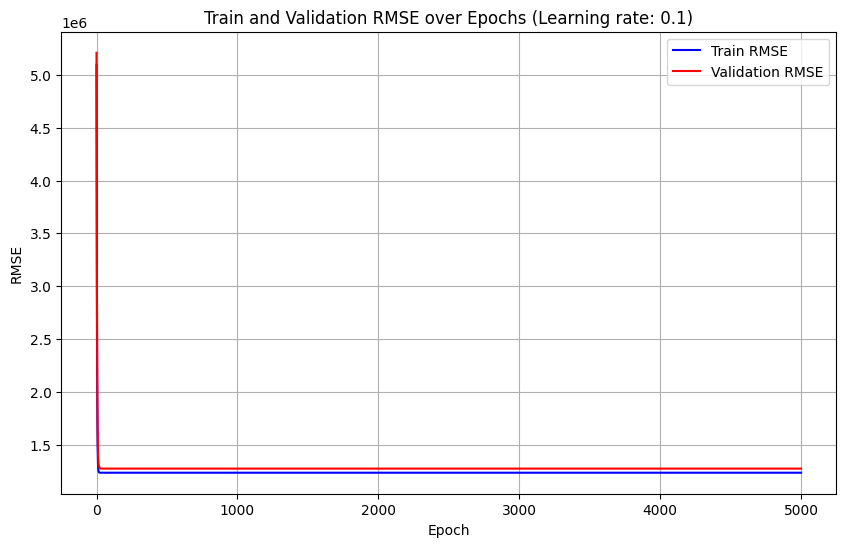


Training with learning rate: 0.01
Epoch 0, Training RMSE 5096888.0000, Validation RMSE 5211146.0000
Epoch 500, Training RMSE 1232811.0000, Validation RMSE 1271882.0000
Epoch 1000, Training RMSE 1232810.6250, Validation RMSE 1271839.0000
Epoch 1500, Training RMSE 1232810.6250, Validation RMSE 1271839.0000
Epoch 2000, Training RMSE 1232810.6250, Validation RMSE 1271839.0000
Epoch 2500, Training RMSE 1232810.6250, Validation RMSE 1271839.0000
Epoch 3000, Training RMSE 1232810.6250, Validation RMSE 1271839.0000
Epoch 3500, Training RMSE 1232810.6250, Validation RMSE 1271839.0000
Epoch 4000, Training RMSE 1232810.6250, Validation RMSE 1271839.0000
Epoch 4500, Training RMSE 1232810.6250, Validation RMSE 1271839.0000
Epoch 5000, Training RMSE 1232810.6250, Validation RMSE 1271839.0000
Final parameters with learning rate 0.01: [tensor([704280.7500, 130759.9062, 538429.3125, 469212.0625, 266938.8750],
       requires_grad=True), tensor(4715709., requires_grad=True)]


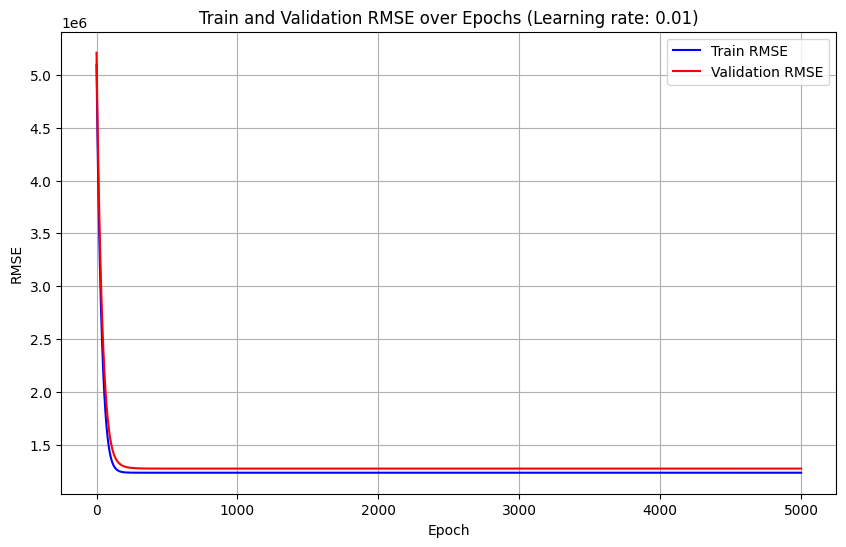


Training with learning rate: 0.001
Epoch 0, Training RMSE 5096888.0000, Validation RMSE 5211146.0000
Epoch 500, Training RMSE 2135681.7500, Validation RMSE 2371594.5000
Epoch 1000, Training RMSE 1391826.2500, Validation RMSE 1541348.6250
Epoch 1500, Training RMSE 1256845.0000, Validation RMSE 1339756.2500
Epoch 2000, Training RMSE 1236494.0000, Validation RMSE 1291626.2500
Epoch 2500, Training RMSE 1233425.7500, Validation RMSE 1278341.2500
Epoch 3000, Training RMSE 1232927.2500, Validation RMSE 1274127.0000
Epoch 3500, Training RMSE 1232836.1250, Validation RMSE 1272674.8750
Epoch 4000, Training RMSE 1232817.0000, Validation RMSE 1272152.3750
Epoch 4500, Training RMSE 1232812.3750, Validation RMSE 1271958.6250
Epoch 5000, Training RMSE 1232811.1250, Validation RMSE 1271889.7500
Final parameters with learning rate 0.001: [tensor([703818.6250, 131720.1094, 538019.6875, 468650.7812, 267388.0312],
       requires_grad=True), tensor(4715429.5000, requires_grad=True)]


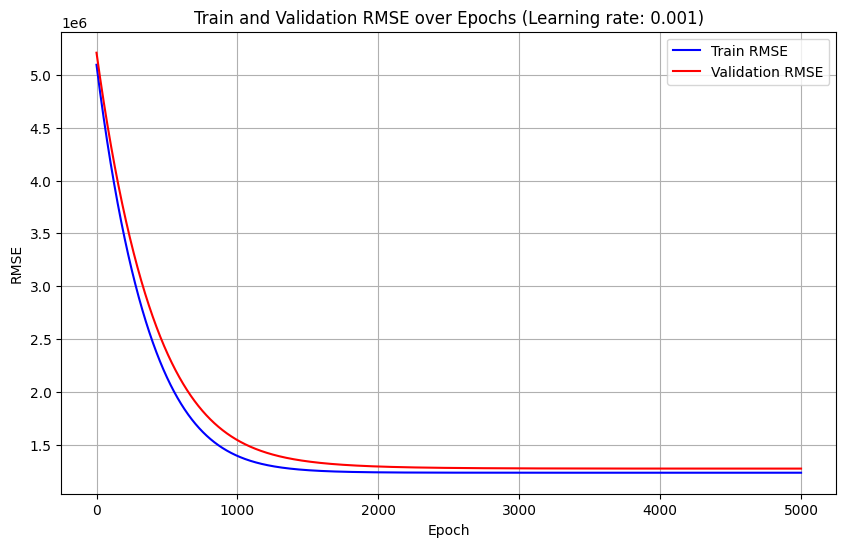


Training with learning rate: 0.0001
Epoch 0, Training RMSE 5096888.0000, Validation RMSE 5211146.0000
Epoch 500, Training RMSE 4602439.0000, Validation RMSE 4756178.5000
Epoch 1000, Training RMSE 4168633.0000, Validation RMSE 4352401.5000
Epoch 1500, Training RMSE 3787327.0000, Validation RMSE 3993380.0000
Epoch 2000, Training RMSE 3451775.5000, Validation RMSE 3673772.5000
Epoch 2500, Training RMSE 3156348.5000, Validation RMSE 3389097.2500
Epoch 3000, Training RMSE 2896299.5000, Validation RMSE 3135542.5000
Epoch 3500, Training RMSE 2667594.7500, Validation RMSE 2909835.7500
Epoch 4000, Training RMSE 2466764.2500, Validation RMSE 2709128.0000
Epoch 4500, Training RMSE 2290788.5000, Validation RMSE 2530911.0000
Epoch 5000, Training RMSE 2137008.5000, Validation RMSE 2372951.7500
Final parameters with learning rate 0.0001: [tensor([516873.2500, 285423.4375, 418817.9062, 383426.1875, 319915.1250],
       requires_grad=True), tensor(2987585.5000, requires_grad=True)]


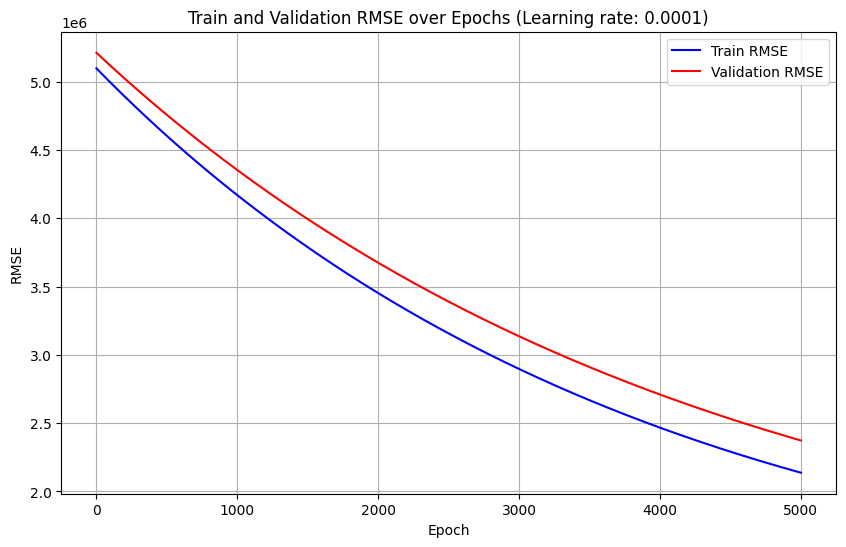

In [ ]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
number_of_epochs=5000
for learning_rate in learning_rates:
  print(f"\nTraining with learning rate: {learning_rate}")
  w = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
  b = torch.tensor(0.0, requires_grad=True)
  optimizer=optim.SGD([w, b], lr=learning_rate)
  trained_parameters, train_rmse, val_rmse=train(
      n_epochs=number_of_epochs,
      model=linear_model,
      optimizer=optimizer,
      parameters=[w,b],
      x_train=train_X,
      y_train=train_Y,
      x_val=val_X,
      y_val=val_Y
  )
  print(f"Final parameters with learning rate {learning_rate}: {trained_parameters}")
  plt.figure(figsize=(10, 6))
  plt.plot(range(0, number_of_epochs+1), train_rmse, label='Train RMSE', color='blue')
  plt.plot(range(0, number_of_epochs+1), val_rmse, label='Validation RMSE', color='red')
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.title(f'Train and Validation RMSE over Epochs (Learning rate: {learning_rate})')
  plt.legend()
  plt.grid(True)
  plt.show()


Training with learning rate: 0.1
Epoch 0, Training RMSE 5096888.0000, Validation RMSE 5211146.0000
Epoch 500, Training RMSE 1232810.6250, Validation RMSE 1271890.1250
Epoch 1000, Training RMSE 1232810.7500, Validation RMSE 1271890.2500
Epoch 1500, Training RMSE 1232810.6250, Validation RMSE 1271890.0000
Epoch 2000, Training RMSE 1232810.7500, Validation RMSE 1271890.0000
Epoch 2500, Training RMSE 1232810.6250, Validation RMSE 1271890.1250
Epoch 3000, Training RMSE 1232810.6250, Validation RMSE 1271890.0000
Epoch 3500, Training RMSE 1232810.6250, Validation RMSE 1271890.0000
Epoch 4000, Training RMSE 1232810.7500, Validation RMSE 1271890.1250
Epoch 4500, Training RMSE 1232810.7500, Validation RMSE 1271890.1250
Epoch 5000, Training RMSE 1232810.6250, Validation RMSE 1271890.0000
Final parameters with learning rate 0.1: [tensor([704252.3125, 130778.8750, 538409.2500, 469195.9375, 266943.7812],
       requires_grad=True), tensor(4715485.5000, requires_grad=True)]


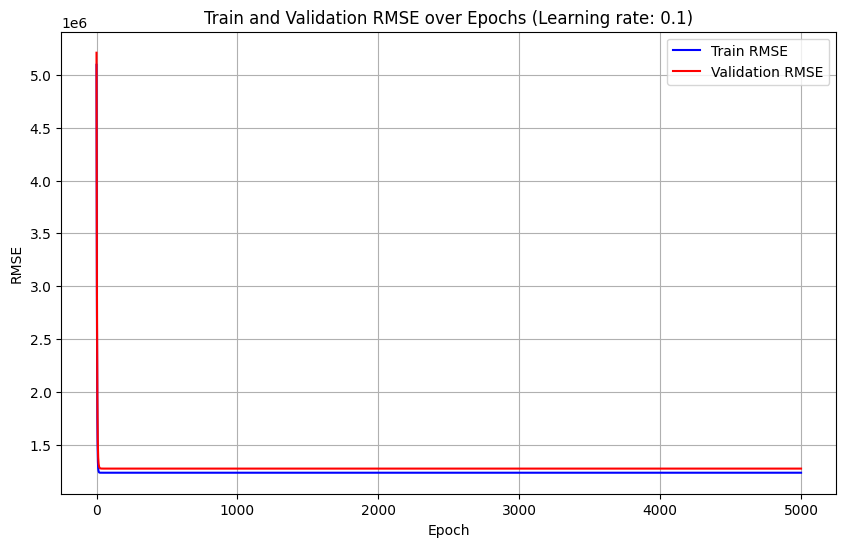


Training with learning rate: 0.01
Epoch 0, Training RMSE 5096888.0000, Validation RMSE 5211146.0000
Epoch 500, Training RMSE 1232811.1250, Validation RMSE 1271938.7500
Epoch 1000, Training RMSE 1232810.6250, Validation RMSE 1271895.6250
Epoch 1500, Training RMSE 1232810.7500, Validation RMSE 1271895.5000
Epoch 2000, Training RMSE 1232810.7500, Validation RMSE 1271895.5000
Epoch 2500, Training RMSE 1232810.7500, Validation RMSE 1271895.5000
Epoch 3000, Training RMSE 1232810.7500, Validation RMSE 1271895.6250
Epoch 3500, Training RMSE 1232810.7500, Validation RMSE 1271895.6250
Epoch 4000, Training RMSE 1232810.7500, Validation RMSE 1271895.6250
Epoch 4500, Training RMSE 1232810.7500, Validation RMSE 1271895.6250
Epoch 5000, Training RMSE 1232810.7500, Validation RMSE 1271895.6250
Final parameters with learning rate 0.01: [tensor([704252.0000, 130780.9297, 538405.7500, 469196.1875, 266944.8438],
       requires_grad=True), tensor(4715459., requires_grad=True)]


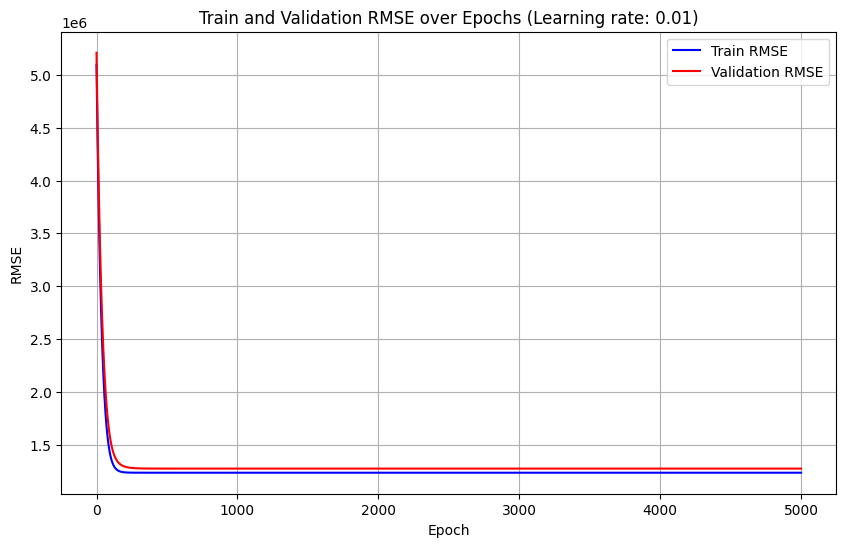


Training with learning rate: 0.001
Epoch 0, Training RMSE 5096888.0000, Validation RMSE 5211146.0000
Epoch 500, Training RMSE 2135763.0000, Validation RMSE 2371678.5000
Epoch 1000, Training RMSE 1391930.6250, Validation RMSE 1541487.1250
Epoch 1500, Training RMSE 1256894.8750, Validation RMSE 1339861.1250
Epoch 2000, Training RMSE 1236513.5000, Validation RMSE 1291705.0000
Epoch 2500, Training RMSE 1233433.1250, Validation RMSE 1278408.0000
Epoch 3000, Training RMSE 1232930.1250, Validation RMSE 1274188.3750
Epoch 3500, Training RMSE 1232837.2500, Validation RMSE 1272734.1250
Epoch 4000, Training RMSE 1232817.3750, Validation RMSE 1272210.6250
Epoch 4500, Training RMSE 1232812.5000, Validation RMSE 1272016.3750
Epoch 5000, Training RMSE 1232811.2500, Validation RMSE 1271947.2500
Final parameters with learning rate 0.001: [tensor([703794.0625, 131744.8125, 537993.9375, 468625.7812, 267391.3750],
       requires_grad=True), tensor(4715179.5000, requires_grad=True)]


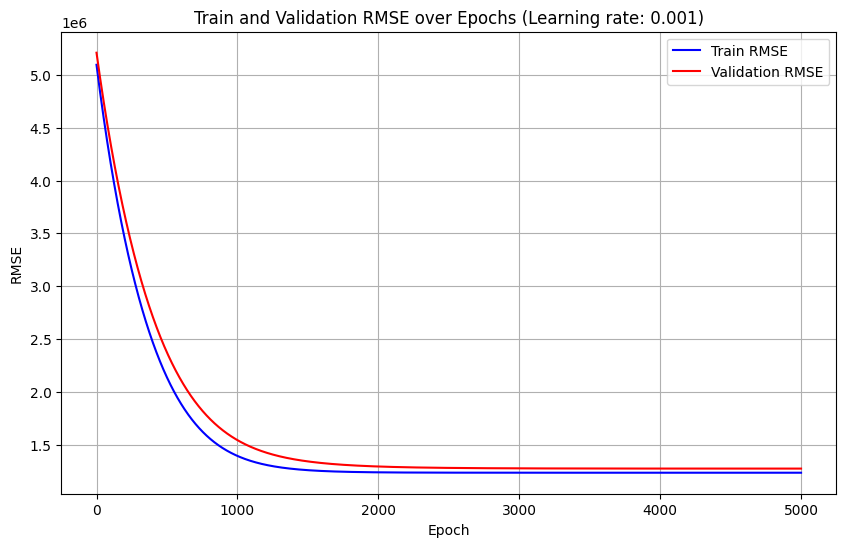


Training with learning rate: 0.0001
Epoch 0, Training RMSE 5096888.0000, Validation RMSE 5211146.0000
Epoch 500, Training RMSE 4602439.5000, Validation RMSE 4756179.0000
Epoch 1000, Training RMSE 4168635.5000, Validation RMSE 4352403.5000
Epoch 1500, Training RMSE 3787332.2500, Validation RMSE 3993385.0000
Epoch 2000, Training RMSE 3451784.5000, Validation RMSE 3673781.0000
Epoch 2500, Training RMSE 3156360.5000, Validation RMSE 3389108.7500
Epoch 3000, Training RMSE 2896315.0000, Validation RMSE 3135557.7500
Epoch 3500, Training RMSE 2667612.7500, Validation RMSE 2909853.5000
Epoch 4000, Training RMSE 2466784.5000, Validation RMSE 2709148.2500
Epoch 4500, Training RMSE 2290812.5000, Validation RMSE 2530935.2500
Epoch 5000, Training RMSE 2137035.5000, Validation RMSE 2372979.7500
Final parameters with learning rate 0.0001: [tensor([516869.2188, 285423.4062, 418815.2500, 383424.2188, 319913.9688],
       requires_grad=True), tensor(2987553., requires_grad=True)]


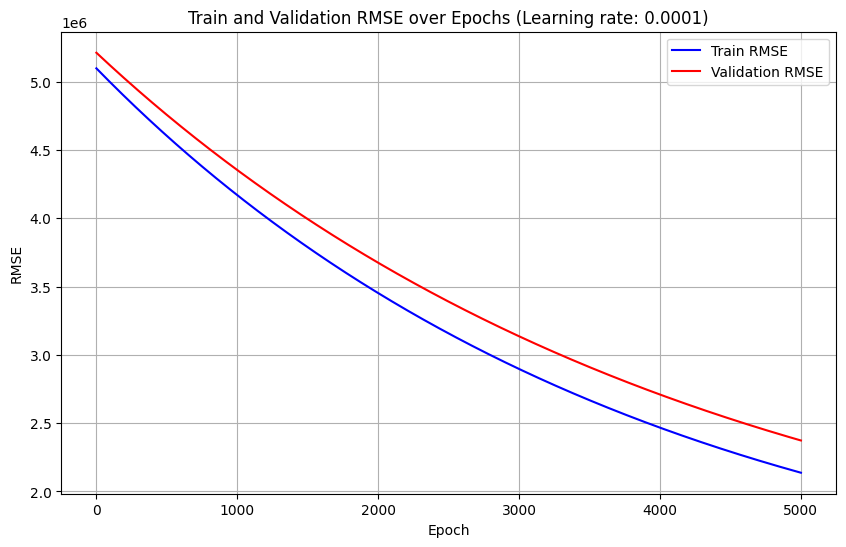

In [ ]:
learning_rates = [0.1,0.01,0.001,0.0001]
number_of_epochs=5000
for learning_rate in learning_rates:
  print(f"\nTraining with learning rate: {learning_rate}")
  w = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
  b = torch.tensor(0.0, requires_grad=True)
  optimizer=optim.ASGD([w, b], lr=learning_rate)
  trained_parameters, train_rmse, val_rmse=train(
      n_epochs=number_of_epochs,
      model=linear_model,
      optimizer=optimizer,
      parameters=[w,b],
      x_train=train_X,
      y_train=train_Y,
      x_val=val_X,
      y_val=val_Y
  )
  print(f"Final parameters with learning rate {learning_rate}: {trained_parameters}")
  plt.figure(figsize=(10, 6))
  plt.plot(range(0, number_of_epochs+1), train_rmse, label='Train RMSE', color='blue')
  plt.plot(range(0, number_of_epochs+1), val_rmse, label='Validation RMSE', color='red')
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.title(f'Train and Validation RMSE over Epochs (Learning rate: {learning_rate})')
  plt.legend()
  plt.grid(True)
  plt.show()